In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
def mean_by_bins(data, bin_idx):
    return np.array([np.mean(data[bin_idx == i]) 
                     for i in range(np.max(bin_idx) + 1)])

def std_by_bins(data, bin_idx):
    return np.array([np.std(data[bin_idx == i]) 
                     for i in range(np.max(bin_idx) + 1)])


def plot_hbond(ax, dat_filename, s_root, ylabel):
    data = np.loadtxt(dat_filename).T[1:]
    s = np.array([np.loadtxt(f'{s_root}/{i+1}.dat')[:,0] 
                  for i in range(60)])
    _, x = np.histogram(s, bins=50, range=(np.min(s), np.max(s)+1E-6))
    bin_centers = (x[1:] + x[:-1]) / 2
    bin_width = x[1] - x[0]
    bin_idx = ((s - x[0]) // bin_width).astype(int)
    
    mean_data = mean_by_bins(data, bin_idx)
    std_data = std_by_bins(data, bin_idx)
    
    ax.set_ylim([1.5,7])
    ax.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax.set_ylabel(ylabel)
    ax.plot(bin_centers, mean_data, c='blue')
    ax.fill_between(bin_centers, 
                    mean_data - std_data, 
                    mean_data + std_data, 
                    facecolor='blue',
                    alpha=0.2)

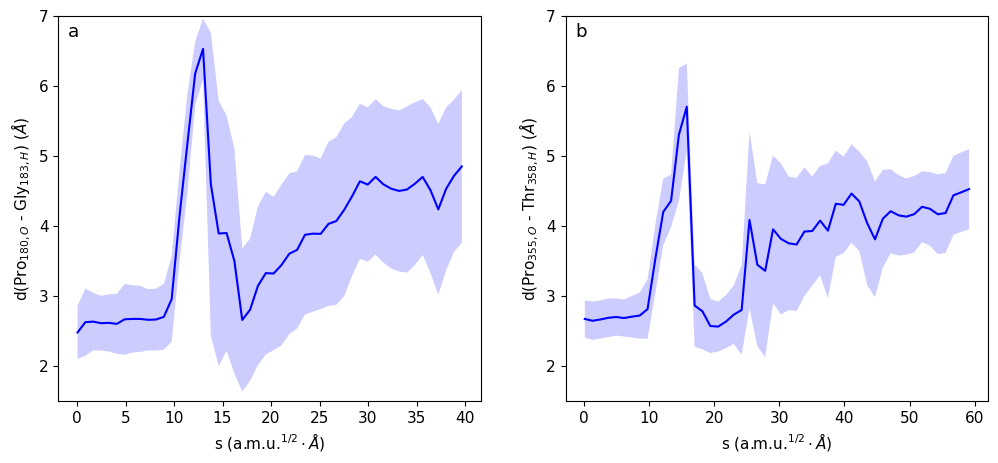

In [5]:
fig, axs = plt.subplot_mosaic([['a', 'b']], figsize=(12,5))

plot_hbond(axs['a'], 'data/hbond_ptp1b.dat', 'data/s_PTP1B/', 
           'd(Pro$_{180,O}$ - Gly$_{183,H}$) ($\AA$)')
plot_hbond(axs['b'], 'data/hbond_yoph.dat', 'data/s_YOPH/', 
           'd(Pro$_{355,O}$ - Thr$_{358,H}$) ($\AA$)')

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans, 
            verticalalignment='top', fontsize='large')
    
plt.savefig('S6.png', dpi=300, bbox_inches='tight')
plt.show()